In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [2]:
dataset = pd.read_csv('appdata10.csv')

In [4]:
### EDA ###
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [5]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
## Data Cleaning
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [7]:
### Plotting ###
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


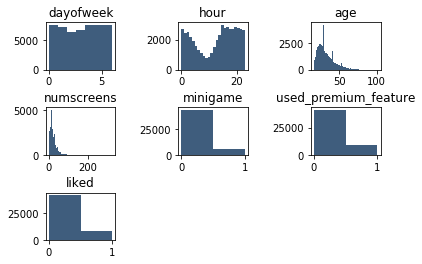

In [32]:
### Histograms
#plt.suptitle('Histograms of Numerical Columns ', fontsize = 20)

for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.subplots_adjust(wspace = 0.9, hspace = 0.8)
    plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = '#3F5D7D')

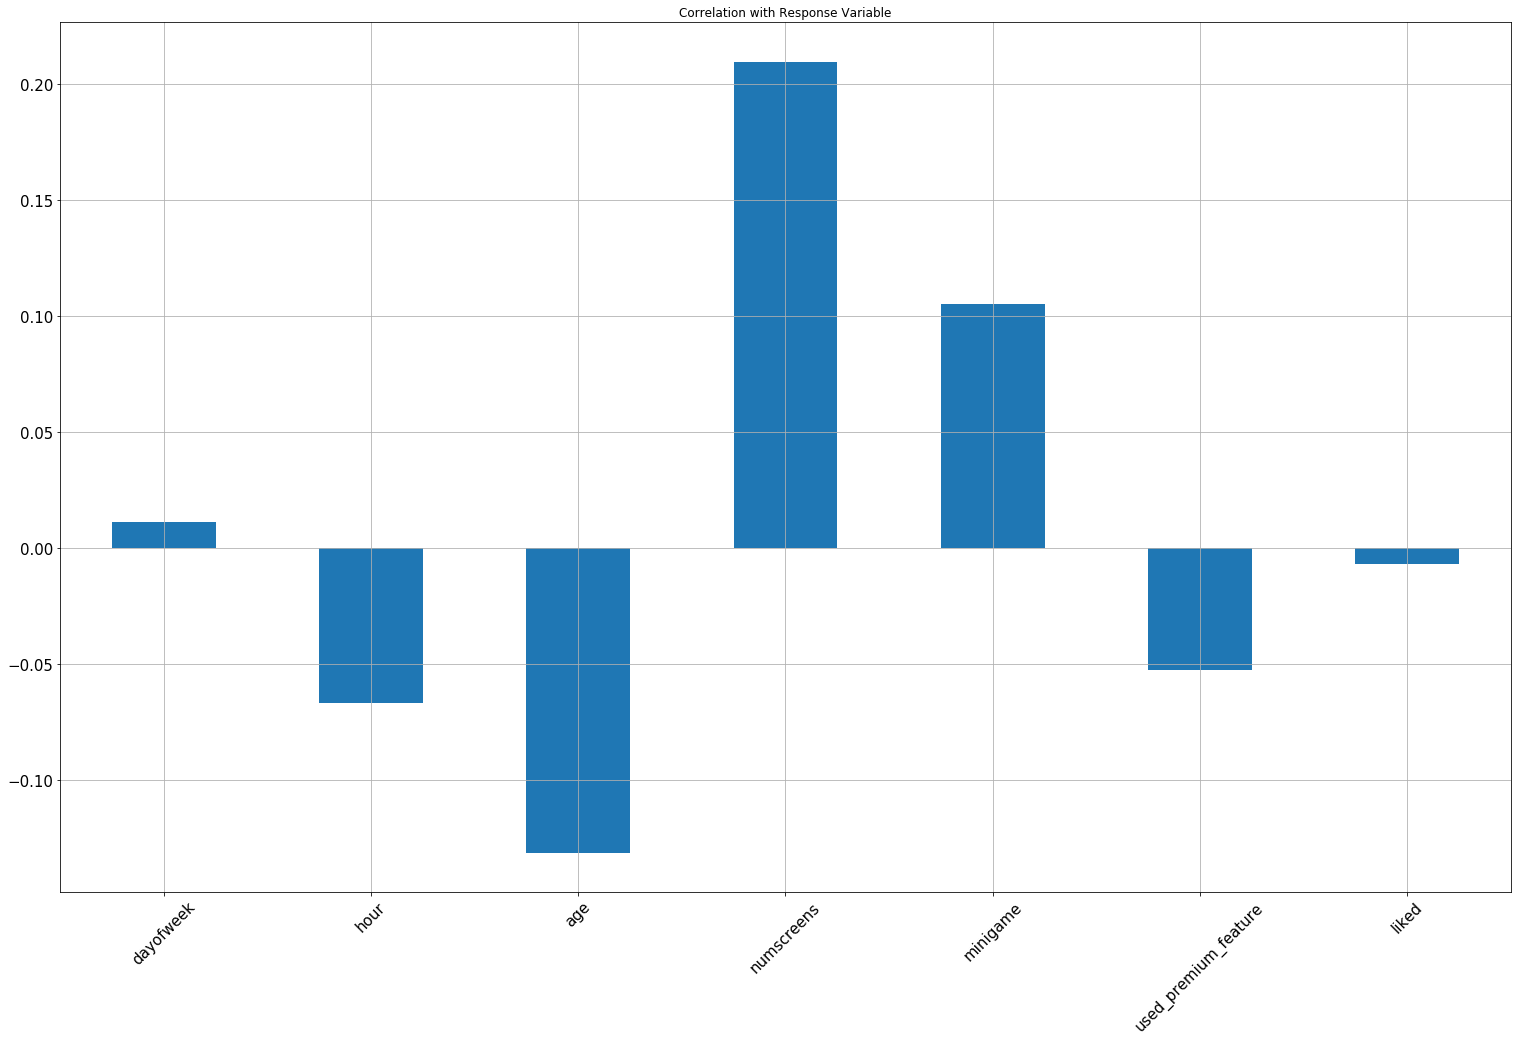

In [33]:
### Correlation with response
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (26, 16), 
                                             title = 'Correlation with Response Variable', 
                                            fontsize = 15, rot = 45,
                                            grid = True)
                                                

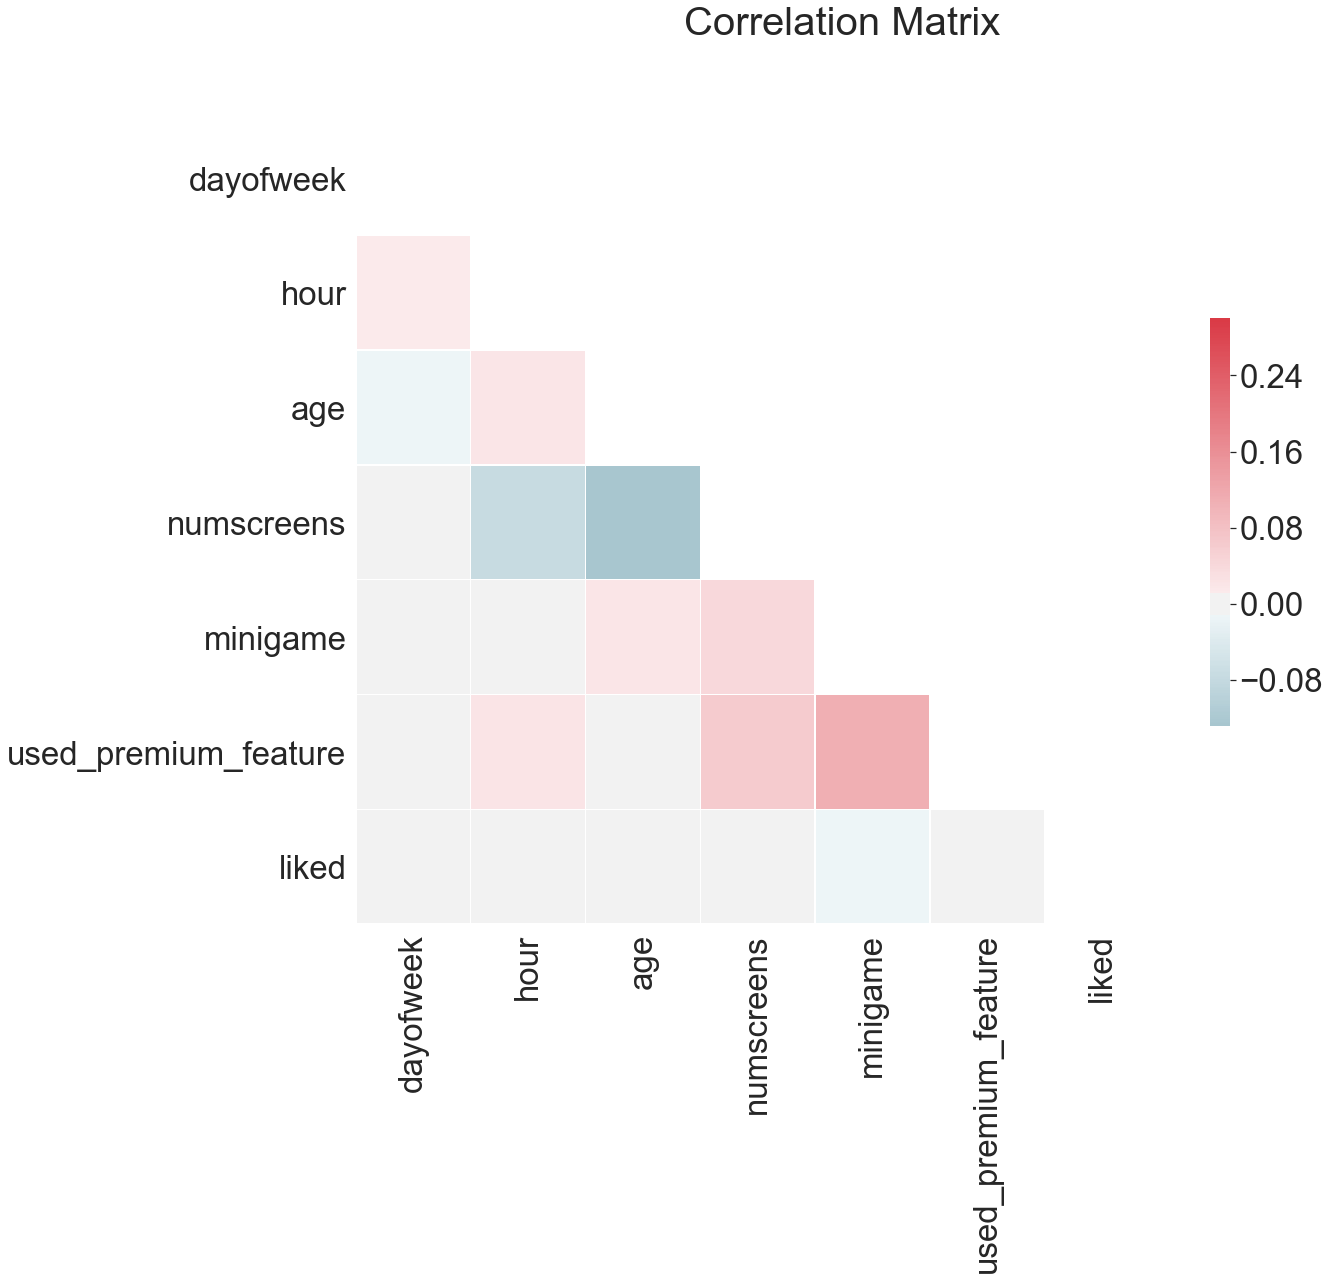

In [38]:
### Correlation matrix
sn.set(style='white', font_scale=3)

#Compute the correlation matrix
corr = dataset2.corr()

#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix', fontsize=40)

#Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and the correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, 
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
### Feature Engineering ###
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [40]:
dataset['first_open'] = [parser.parse(row_data) for row_data in dataset['first_open']]

In [41]:
dataset['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset['enrolled_date']]

In [42]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [43]:
dataset['difference'] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

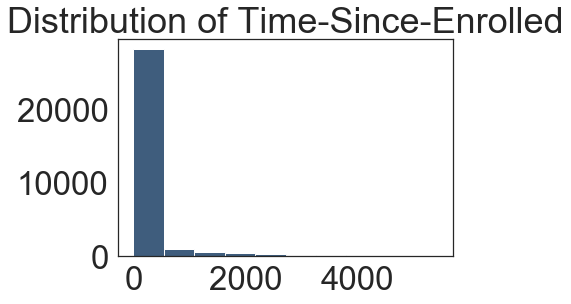

In [44]:
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

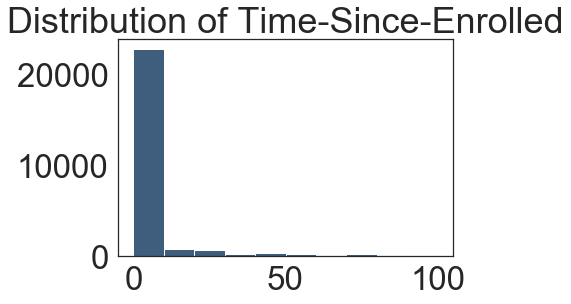

In [45]:
plt.hist(dataset['difference'].dropna(), color = '#3F5D7D', range = [0, 100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [46]:
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [47]:
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [48]:
## Formatting the screen_list Field
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [49]:
dataset['screen_list'] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc + ",","")

In [50]:
dataset['Other'] = dataset.screen_list.str.count(',')
dataset = dataset.drop(columns = ["screen_list"])

In [52]:
### Funnels
savings_screens = ["Saving1", "Saving2", "Saving2Amount", "Saving4", "Saving5", "Saving6", "Saving7",
                  "Saving8", "Saving9", "Saving10"]
dataset['SavingsCount'] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [55]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [56]:
dataset.to_csv("new_appdata10.csv", index = False)